# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




Nesse caso, o teste é unilateral à direita porque estamos especificamente interessados em validar se a média das notas da estratégia B é maior que a média das notas da estratégia A.

Levando em consideração as **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é menor ou igual à média das notas dos alunos na estratégia B. (ou seja, B ≤ A).
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A. (ou seja, B > A).


Resumindo se o valor de p for menor que o nivel de significância, podemos rejeitar a hipótese nula e concluir que a média da estratégia B é maior de fato.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [4]:
import pandas as pd

metricas = {
    "Estratégia": ["A", "B"],
    "Média": [amostra_estrategia_A.mean(), amostra_estrategia_B.mean()],
    "Variância": [amostra_estrategia_A.var(), amostra_estrategia_B.var()],
    "Desvio Padrão": [amostra_estrategia_A.std(), amostra_estrategia_B.std()],
}

df = pd.DataFrame(metricas)

df

,Estratégia,Média,Variância,Desvio Padrão
0,A,71.405593,126.680184,11.255229
1,B,74.748681,108.260620,10.404836


Pelos resultados posso concluir que a média da amostra B é maior, a variância e o desvio padrão da amostra A é maior então podemos concluir que os valores estão destoando mais da média, oque me leva a crer que a estrategia A possa ter valores extremos ou outliers, então a estrategia B por ter resultados mais consitentes possa ter um melhor resultado.

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [11]:
# Tamanho das amostras
n = len(amostra_estrategia_A)

# Calcular a estatística de teste Z com a formula:
z_statistic = (df['Média'][1] - df['Média'][0]) / ((df['Variância'][0]/n + df['Variância'][1]/n)**0.5)
#Nessa linha nós escrevemos a formula do Z vista em aula

# Calcular o p-valor (teste unilateral à direita)
p_valor = 1 - stats.norm.cdf(z_statistic)  # Para unilateral à direita


# Imprimir os resultados
print("Estatística de teste Z:", z_statistic)
print("p-valor:", p_valor)

# Comparar o p-valor com o nível de significância
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula: a média da Estratégia B é maior que a da Estratégia A.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que a média da Estratégia B é maior que a da Estratégia A.")

Estatística de teste Z: 1.542245935902539
p-valor: 0.06150692063904584
Não rejeitamos a hipótese nula: não há evidências suficientes para concluir que a média da Estratégia B é maior que a da Estratégia A.


Conforme o teste Z e calculo do valor de p, observamos que o resultado é maior que o nível de significância. Isso nos indica que não devemos rejeitar a hipótese nula com base nos dados observados. Portanto, a probabilidade de que a Estratégia B seja de fato mais eficaz do que a Estratégia A é improvável. Em outras palavras, não podemos concluir que a Estratégia B tenha um desempenho mais satisfatório do que a Estratégia A.

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

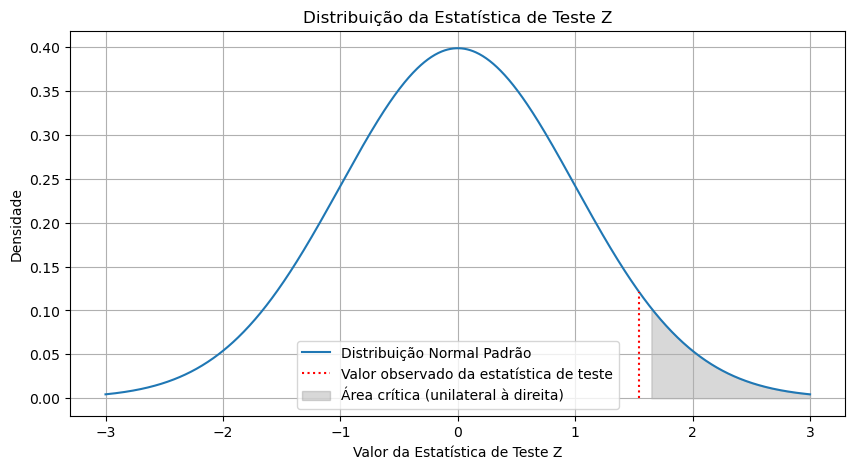

In [13]:
# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Valores de X e Y para plotar a distribuição
x = np.linspace(-3, 3, 1000)
# x = np.linspace(-3, 3, 1000): Esta linha cria um array x de 1000 pontos igualmente espaçados no intervalo de -3 a 3. Esse intervalo foi escolhido para abranger uma ampla gama de valores típicos para a estatística de teste Z, que segue uma distribuição normal padrão
y = stats.norm.pdf(x, 0, 1)
# y = stats.norm.pdf(x, 0, 1): Esta linha calcula os valores de densidade de probabilidade para cada ponto no array x com base na distribuição normal padrão.

# Plotando a distribuição normal padrão
ax.plot(x, y, label='Distribuição Normal Padrão')

# Marcação do valor observado da estatística do teste
ax.vlines(x=[z_statistic], ymin=0, ymax=stats.norm.pdf(z_statistic, 0, 1),
          colors='r', linestyles='dotted', label='Valor observado da estatística de teste')

# Área crítica para o teste unilateral à direita
critical_value = stats.norm.ppf(1 - 0.05)  # 1 - nível de significância (0.05)
ax.fill_between(x, y, where=(x > critical_value), color='gray', alpha=0.3, label='Área crítica (unilateral à direita)')

# Legenda e rótulos
plt.legend()
plt.xlabel('Valor da Estatística de Teste Z')
plt.ylabel('Densidade')
plt.title('Distribuição da Estatística de Teste Z')
plt.grid(True)

# Exibindo o gráfico
plt.show()

Pelo gráfico, podemos ver que o valor da estatística Z está dentro da distribuição, o que nos indica que a diferença entre as médias das duas estratégias é algo esperado, ou seja, é compatível com a hipótese nula de que as médias das estratégias A e B são iguais ou muito próximas.

Além disso, como o valor da estatística Z está fora da área crítica, isso significa que a diferença observada entre as médias não é grande o suficiente para rejeitar a hipótese nula.

Com base nas evidências que temos, não podemos concluir que a Estratégia B seja mais eficaz que a Estratégia A. Em outras palavras, não rejeitamos a hipótese nula, pois não há dados suficientes para afirmar que a Estratégia B tem um desempenho significativamente melhor.